- As we enter the digital age, more and more companies are starting to venture into movie production. To remain on par with their competitors, it may be necessary for a tech giant like Microsoft to also consider movie production. Using data about successful movies from many sources, I describe attributes of successful movies in order to give corporate heads and investors an idea as to what kind of movies Microsoft should produce to ensure success.
- I believe there are two main factors that contribute to a movie's success: the profit it makes and its ratings from critics and moviewatchers.

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
from src.make_db import create_movies_db
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [3]:
conn = sqlite3.connect('data\movies.db')
cur = conn.cursor()

In [4]:
cur.execute("""SELECT * 
               FROM bom_movie_gross
               ORDER BY domestic_gross DESC;""")
test_df = pd.DataFrame(cur.fetchall())
test_df.columns = [x[0] for x in cur.description]
test_df.head(5)

,idx,title,studio,domestic_gross,foreign_gross,year
0,1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
1,3080,Black Panther,BV,700100000.0,646900000,2018
2,3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
4,727,Marvel's The Avengers,BV,623400000.0,895500000,2012


## Data Preparation

Joining `tn_movie_budgets` and `imdb_movie_basics`

In [5]:
cur.execute("""SELECT b.title AS movie, b.domestic_gross, b.foreign_gross, m.genres 
               FROM bom_movie_gross b
               JOIN imdb_title_basics m
               ON b.title = m.primary_title
               GROUP BY movie;""")
gross_df = pd.DataFrame(cur.fetchall())
gross_df.columns = [x[0] for x in cur.description]
gross_df

,movie,domestic_gross,foreign_gross,genres
0,'71,1300000.0,355000,"Action,Drama,Thriller"
1,"1,000 Times Good Night",53900.0,None,"Drama,War"
2,10 Cloverfield Lane,72100000.0,38100000,"Drama,Horror,Mystery"
3,10 Years,203000.0,None,"Comedy,Drama,Romance"
4,1001 Grams,11000.0,None,Drama
...,...,...,...,...
2600,Zindagi Na Milegi Dobara,3100000.0,None,"Comedy,Drama"
2601,Zombeavers,14900.0,None,"Action,Adventure,Comedy"
2602,Zookeeper,80400000.0,89500000,"Comedy,Family,Romance"
2603,Zoolander 2,28800000.0,27900000,Comedy


Splitting movies by genre

In [6]:
gross_df['split_genres'] = gross_df['genres'].str.split(',')
gross_df = gross_df.dropna(subset = ['genres'])

I discovered during my analysis that the `foreign_gross` column had strings, so I converted it into float values



In [7]:
type(gross_df['domestic_gross'].iloc[0])

numpy.float64

In [8]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(',','').astype(float)

<ipython-input-8-a0f91ea86bdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(',','').astype(float)


In [9]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(0)

<ipython-input-9-16b5401ce21f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(0)


In [10]:
gross_df['domestic_gross'].dropna()
gross_df['total_gross'] = gross_df['domestic_gross'] + gross_df['foreign_gross']

<ipython-input-10-110fddf8954f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_df['total_gross'] = gross_df['domestic_gross'] + gross_df['foreign_gross']


In [11]:
gross_df = gross_df.explode('split_genres')
gross_df

,movie,domestic_gross,foreign_gross,genres,split_genres,total_gross
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",Action,1.655000e+06
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",Drama,1.655000e+06
0,'71,1300000.0,355000.0,"Action,Drama,Thriller",Thriller,1.655000e+06
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",Drama,5.390000e+04
1,"1,000 Times Good Night",53900.0,0.0,"Drama,War",War,5.390000e+04
...,...,...,...,...,...,...
2602,Zookeeper,80400000.0,89500000.0,"Comedy,Family,Romance",Romance,1.699000e+08
2603,Zoolander 2,28800000.0,27900000.0,Comedy,Comedy,5.670000e+07
2604,Zootopia,341300000.0,682500000.0,"Adventure,Animation,Comedy",Adventure,1.023800e+09
2604,Zootopia,341300000.0,682500000.0,"Adventure,Animation,Comedy",Animation,1.023800e+09


In [12]:
gross_df.isna().sum()

movie              0
domestic_gross    42
foreign_gross      0
genres             0
split_genres       0
total_gross       42
dtype: int64

Creating IMDB ratings data frame

In [13]:
cur.execute("""SELECT m.primary_title, r.averagerating, r.numvotes, m.genres
               FROM imdb_title_basics m
               JOIN imdb_title_ratings r
               USING(tconst);""")
ratings_df = pd.DataFrame(cur.fetchall())
ratings_df.columns = [x[0] for x in cur.description]
ratings_df

,primary_title,averagerating,numvotes,genres
0,Sunghursh,7.0,77,"Action,Crime,Drama"
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama"
2,The Other Side of the Wind,6.9,4517,Drama
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama"
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy"
...,...,...,...,...
73851,Diabolik sono io,6.2,6,Documentary
73852,Sokagin Çocuklari,8.7,136,"Drama,Family"
73853,Albatross,8.5,8,Documentary
73854,La vida sense la Sara Amat,6.6,5,None


Spliting genres for each movie

In [14]:
ratings_df['split_genres'] = ratings_df['genres'].str.split(',')
ratings_df

,primary_title,averagerating,numvotes,genres,split_genres
0,Sunghursh,7.0,77,"Action,Crime,Drama","[Action, Crime, Drama]"
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama","[Biography, Drama]"
2,The Other Side of the Wind,6.9,4517,Drama,[Drama]
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama","[Comedy, Drama]"
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"
...,...,...,...,...,...
73851,Diabolik sono io,6.2,6,Documentary,[Documentary]
73852,Sokagin Çocuklari,8.7,136,"Drama,Family","[Drama, Family]"
73853,Albatross,8.5,8,Documentary,[Documentary]
73854,La vida sense la Sara Amat,6.6,5,None,None


In [15]:
ratings_df = ratings_df.dropna(subset = ['genres'])

In [16]:
ratings_df = ratings_df.explode('split_genres')
ratings_df

,primary_title,averagerating,numvotes,genres,split_genres
0,Sunghursh,7.0,77,"Action,Crime,Drama",Action
0,Sunghursh,7.0,77,"Action,Crime,Drama",Crime
0,Sunghursh,7.0,77,"Action,Crime,Drama",Drama
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama",Biography
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama",Drama
...,...,...,...,...,...
73851,Diabolik sono io,6.2,6,Documentary,Documentary
73852,Sokagin Çocuklari,8.7,136,"Drama,Family",Drama
73852,Sokagin Çocuklari,8.7,136,"Drama,Family",Family
73853,Albatross,8.5,8,Documentary,Documentary


I also wanted to observe common combinations of movie genres, so I filtered out movie genres with less than 500 movie under those genres and created a new data frame for the filtered movie list

In [17]:
x_df = ratings_df.groupby('genres').count().iloc[:,0]
x2_df = x_df[x_df >= 500].index
combined_ratings_df = ratings_df[ratings_df.genres.isin(x2_df)]
combined_ratings_df.groupby('genres').mean().head()

,averagerating,numvotes
genres,,
Action,5.757712,336.115424
"Action,Adventure,Animation",6.562874,21380.497006
"Action,Adventure,Comedy",5.554032,29260.830645
"Action,Adventure,Drama",5.691579,23607.594737
"Action,Comedy",5.748936,3020.492401


Creating data frame for Rotten Tomatoes data

In [18]:
cur.execute("""SELECT movie_title, genres, tomatometer_status, tomatometer_rating, tomatometer_count, audience_status, audience_rating, audience_count
               FROM rotten_tomatoes_movies
               ORDER BY audience_count DESC
               LIMIT 1000;""")
rotten_tomatoes_df = pd.DataFrame(cur.fetchall())
rotten_tomatoes_df.columns = [x[0] for x in cur.description]
rotten_tomatoes_df.head(5)

,movie_title,genres,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count
0,Titanic,"Drama, Romance",Certified-Fresh,89.0,192.0,Upright,69.0,35797635.0
1,The Lord of the Rings: The Return of the King,"Action & Adventure, Classics, Science Fiction ...",Certified-Fresh,93.0,275.0,Upright,86.0,34679773.0
2,Spider-Man,"Action & Adventure, Mystery & Suspense, Scienc...",Certified-Fresh,90.0,245.0,Upright,67.0,34297354.0
3,Shrek 2,"Animation, Comedy, Kids & Family, Science Fict...",Certified-Fresh,89.0,236.0,Upright,69.0,34232524.0
4,Harry Potter and the Goblet of Fire,"Action & Adventure, Kids & Family, Science Fic...",Certified-Fresh,88.0,255.0,Upright,74.0,34153607.0


In [19]:
rotten_tomatoes_df['split_genres'] = rotten_tomatoes_df['genres'].str.split(',')
rotten_tomatoes_df = rotten_tomatoes_df.explode('split_genres')
rotten_tomatoes_df['split_genres'] = rotten_tomatoes_df['split_genres'].str.lstrip(" ")

## Data Visualization

Average ratings by genre, for genre categories with more than 500 entries

Text(0.5, 1.0, 'IMDB Average Movie Ratings (Combined Genres)')

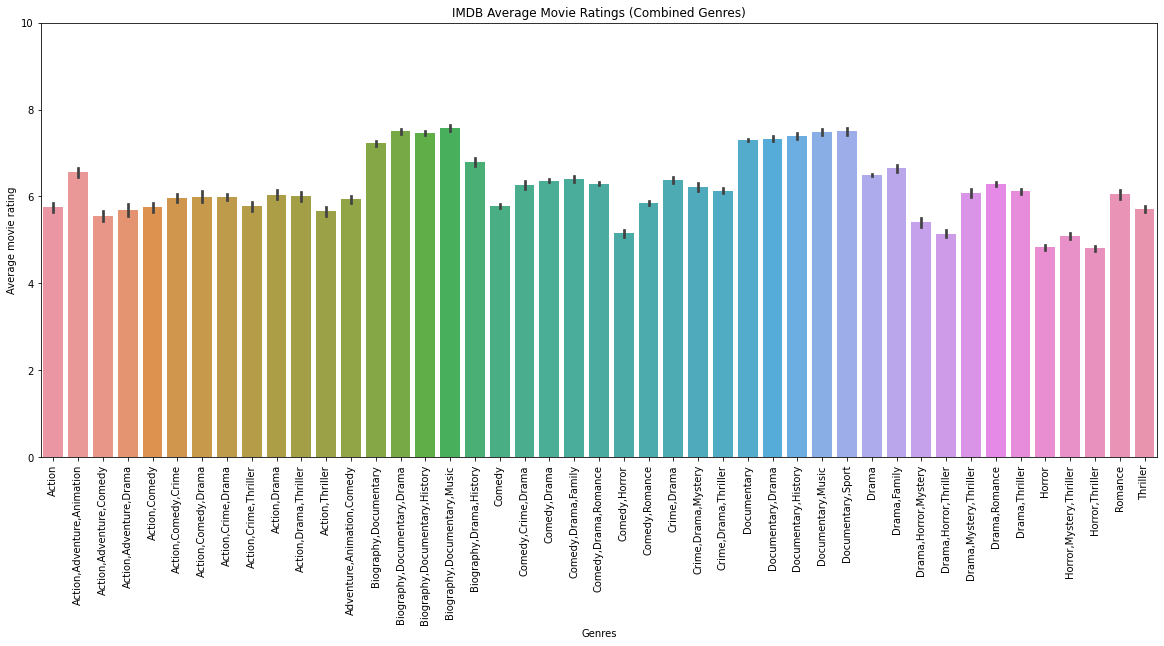

In [27]:
f, ax = plt.subplots(figsize=(20,8))
ax = sns.barplot(x='genres', y='averagerating', data=combined_ratings_df,
                order=x2_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0,10)
ax.set_xlabel('Genres')
ax.set_ylabel('Average movie rating')
ax.set_title('IMDB Average Movie Ratings (Combined Genres)')

Text(0.5, 1.0, 'IMDB Average Movie Ratings (Individual Genres)')

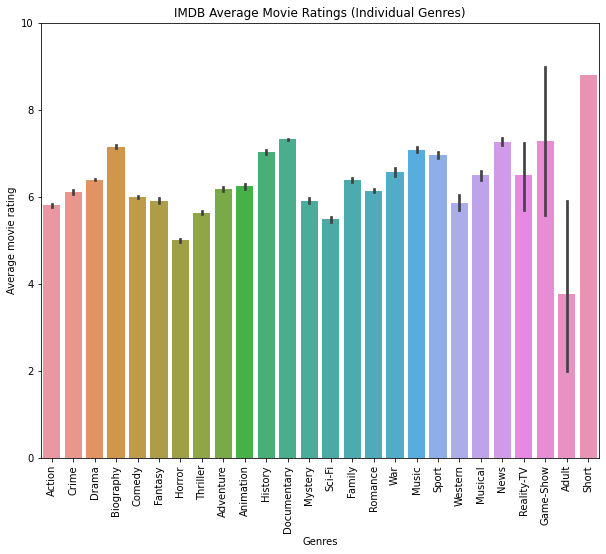

In [28]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x='split_genres', y='averagerating', data=ratings_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0,10)
ax.set_xlabel('Genres')
ax.set_ylabel('Average movie rating')
ax.set_title('IMDB Average Movie Ratings (Individual Genres)')

Comparing ratings per genre for critics vs audience ratings on Rotten Tomatoes (top 1000 movies by audience votes)



[Text(0, 0, 'Drama'),
 Text(1, 0, ' Romance'),
 Text(2, 0, 'Action & Adventure'),
 Text(3, 0, ' Classics'),
 Text(4, 0, ' Science Fiction & Fantasy'),
 Text(5, 0, ' Mystery & Suspense'),
 Text(6, 0, 'Animation'),
 Text(7, 0, ' Comedy'),
 Text(8, 0, ' Kids & Family'),
 Text(9, 0, ' Drama'),
 Text(10, 0, 'Kids & Family'),
 Text(11, 0, 'Comedy'),
 Text(12, 0, ' Sports & Fitness'),
 Text(13, 0, ' Horror'),
 Text(14, 0, 'Horror'),
 Text(15, 0, 'Mystery & Suspense'),
 Text(16, 0, ' Musical & Performing Arts'),
 Text(17, 0, ' Animation'),
 Text(18, 0, 'Cult Movies'),
 Text(19, 0, ' Special Interest'),
 Text(20, 0, 'Classics'),
 Text(21, 0, ' Documentary'),
 Text(22, 0, 'Art House & International'),
 Text(23, 0, ' Western'),
 Text(24, 0, ' Art House & International'),
 Text(25, 0, ' Cult Movies'),
 Text(26, 0, 'Musical & Performing Arts'),
 Text(27, 0, 'Science Fiction & Fantasy'),
 Text(28, 0, 'Documentary')]

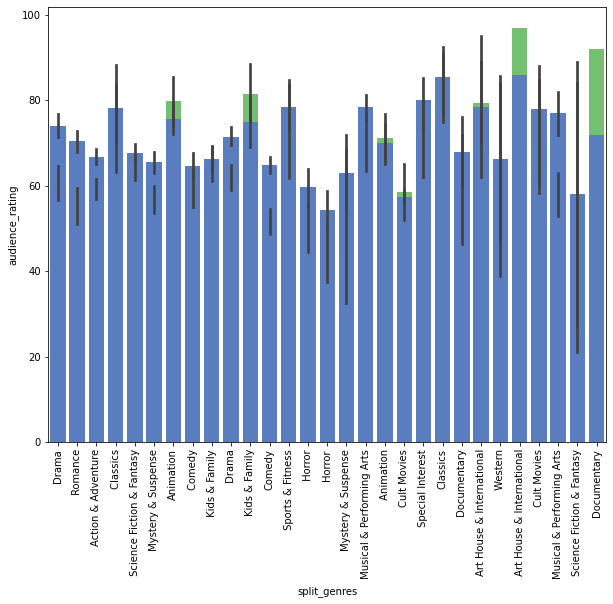

In [33]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x='split_genres', y='tomatometer_rating', data=rotten_tomatoes_df, color='g')
ax = sns.barplot(x='split_genres', y='audience_rating', data=rotten_tomatoes_df, color='b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Average Gross Profit Based On Genre')

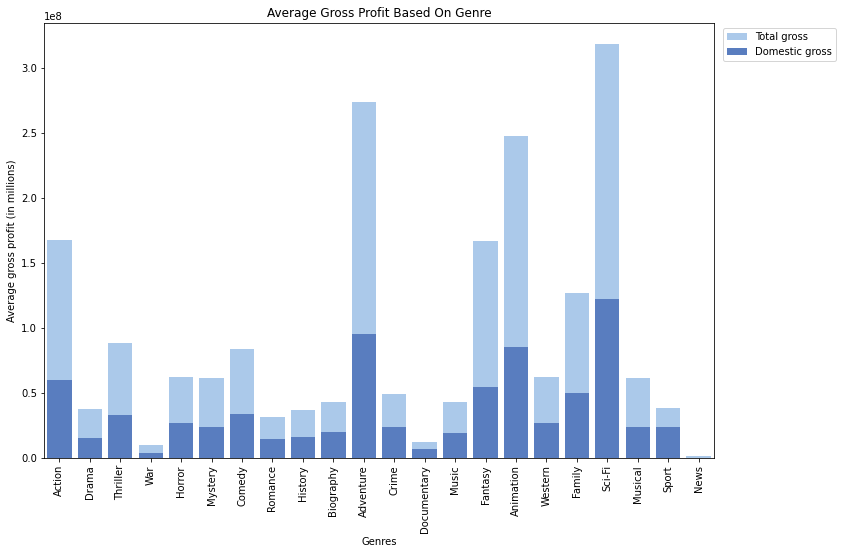

In [32]:
f, ax = plt.subplots(figsize=(12,8))
sns.set_color_codes('pastel')
sns.barplot(x='split_genres', y='total_gross', data=gross_df, label='Total gross', color='b', ci=None)

sns.set_color_codes('muted')
sns.barplot(x='split_genres', y='domestic_gross', data=gross_df, label='Domestic gross', color='b', ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1.19, 1), loc="upper right", frameon=True)
ax.set_xlabel('Genres')
ax.set_ylabel('Average gross profit (in millions)')
ax.set_title('Average Gross Profit Based On Genre')

Average gross by genre

[Text(0, 0, 'Action'),
 Text(1, 0, 'Crime'),
 Text(2, 0, 'Drama'),
 Text(3, 0, 'Comedy'),
 Text(4, 0, 'Horror'),
 Text(5, 0, 'Thriller'),
 Text(6, 0, 'Adventure'),
 Text(7, 0, 'Animation'),
 Text(8, 0, 'Documentary'),
 Text(9, 0, 'History'),
 Text(10, 0, 'Mystery'),
 Text(11, 0, 'Family'),
 Text(12, 0, 'Romance'),
 Text(13, 0, 'Biography'),
 Text(14, 0, 'Music'),
 Text(15, 0, 'Sport')]

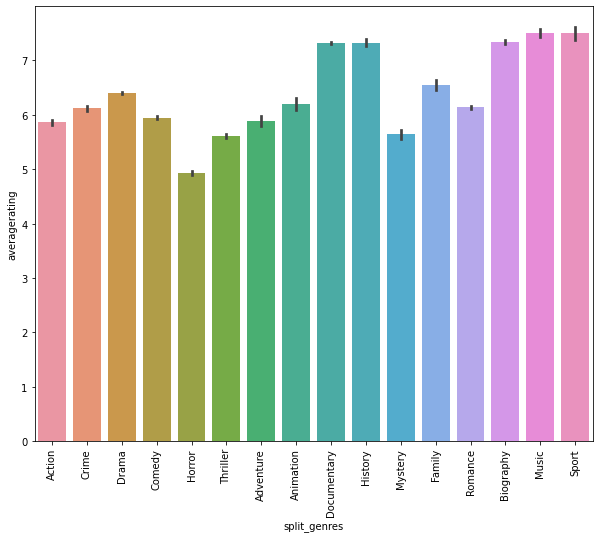

In [21]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x='split_genres', y='averagerating', data=combined_ratings_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Domestic gross earnings across genres

[Text(0, 0, 'Action'),
 Text(1, 0, 'Drama'),
 Text(2, 0, 'Thriller'),
 Text(3, 0, 'War'),
 Text(4, 0, 'Horror'),
 Text(5, 0, 'Mystery'),
 Text(6, 0, 'Comedy'),
 Text(7, 0, 'Romance'),
 Text(8, 0, 'History'),
 Text(9, 0, 'Biography'),
 Text(10, 0, 'Adventure'),
 Text(11, 0, 'Crime'),
 Text(12, 0, 'Documentary'),
 Text(13, 0, 'Music'),
 Text(14, 0, 'Fantasy'),
 Text(15, 0, 'Animation'),
 Text(16, 0, 'Western'),
 Text(17, 0, 'Family'),
 Text(18, 0, 'Sci-Fi'),
 Text(19, 0, 'Musical'),
 Text(20, 0, 'Sport'),
 Text(21, 0, 'News')]

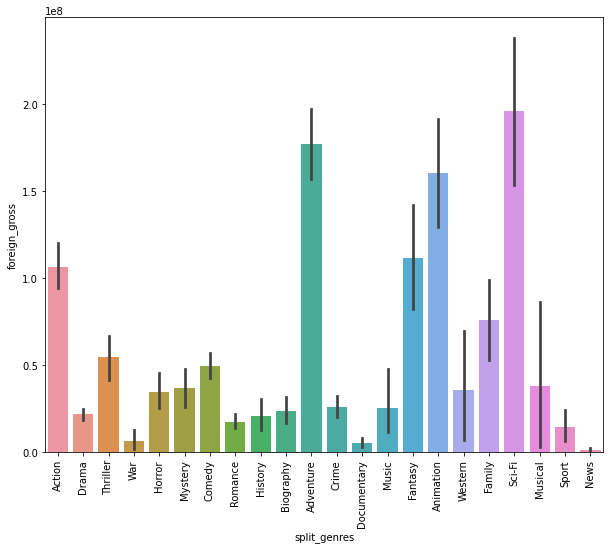

In [24]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x='split_genres', y='foreign_gross', data=gross_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Foreign gross earnings across genres

[Text(0, 0, 'Action'),
 Text(1, 0, 'Drama'),
 Text(2, 0, 'Thriller'),
 Text(3, 0, 'War'),
 Text(4, 0, 'Horror'),
 Text(5, 0, 'Mystery'),
 Text(6, 0, 'Comedy'),
 Text(7, 0, 'Romance'),
 Text(8, 0, 'History'),
 Text(9, 0, 'Biography'),
 Text(10, 0, 'Adventure'),
 Text(11, 0, 'Crime'),
 Text(12, 0, 'Documentary'),
 Text(13, 0, 'Music'),
 Text(14, 0, 'Fantasy'),
 Text(15, 0, 'Animation'),
 Text(16, 0, 'Western'),
 Text(17, 0, 'Family'),
 Text(18, 0, 'Sci-Fi'),
 Text(19, 0, 'Musical'),
 Text(20, 0, 'Sport'),
 Text(21, 0, 'News')]

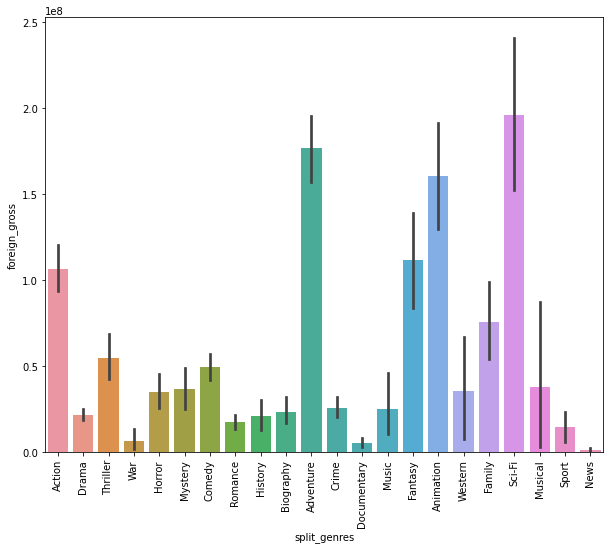

In [25]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x='split_genres', y='foreign_gross', data=gross_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Comparison of domestic and foreign gross earnings across genres

<AxesSubplot:xlabel='split_genres'>

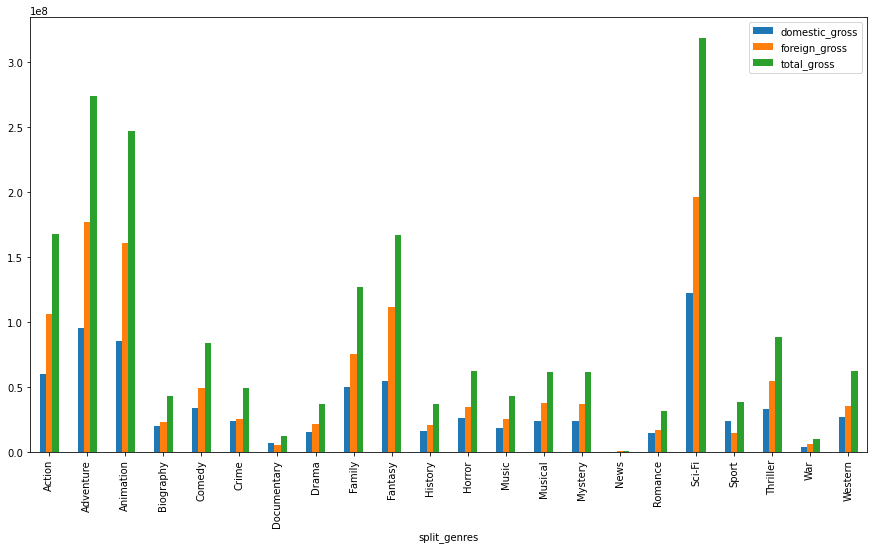

In [26]:
gross_df.groupby('split_genres').mean().plot(figsize=(15,8), kind='bar')

## Conclusions

- You may want to start by offering positions to up and coming directors and scriptwriters, preferrably those who had experience working on successful movies before, and gain leverage in the movie production process.
- Something to take into consideration is that for some movies, a large part of their success can be attributed to expectations tied to many of its factors, such as it being part of a series, or having certain A-list actors. If you want to make a footprint in the movie industry, be sure you keep those limitations in mind as you try to work your way up.